## Sim Demo

### Imports

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from env.imports import *

In [15]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [16]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 3.3%
RAM Usage: 2.8%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [17]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [18]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [19]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

### Example SMT run for UKBB population connectome

Resorting genes by reference genome order
Resorting genes by reference genome order
Number of components for 95% variance PCA: 27
Resorting genes by reference genome order
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
valid_indices 456
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 7mh4qj9r
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/7mh4qj9r
Initialized sweep with ID: 7mh4qj9r
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 2162315
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0428
Best val loss so far at epoch 2: 0.0382
Best val loss so far at epoch 3: 0.0318
Best val loss so far at epoch 4: 0.0291
Best val loss so far at epoch 5: 0.0265
Epoch 5/110, Train Loss: 0.0835, Val Loss: 0.0265, Time: 6.50s
Best val loss so far at epoch 6: 0.0219
Best val loss so far at epoch 7: 0.0205
Best val loss so far at epoch 9: 0.0187
Best val loss so far at epoch 10: 0.0173
Epoch 10/110, Train Loss: 0.0546, Val Loss: 0.0173, Time: 6.57s
Best val loss so far at epoch 13: 0.0171
Epoch 15/110, Train Loss: 0.0435, Val Loss: 0.0183, Time: 7.68s
Best val loss so far at epoch 20: 0.0166
Epoch 20/110, Train Loss: 0.0380, Val Loss: 0.0166, Time: 6.30s
Best val loss so far at epoch 25: 0.0163
Epoch 25/110, Train Loss: 0.0345, Val Loss: 0.0163, Time: 6.25s
Best val loss so far at epoch 27: 0.0154
Epoch 30/110, Train Loss: 0

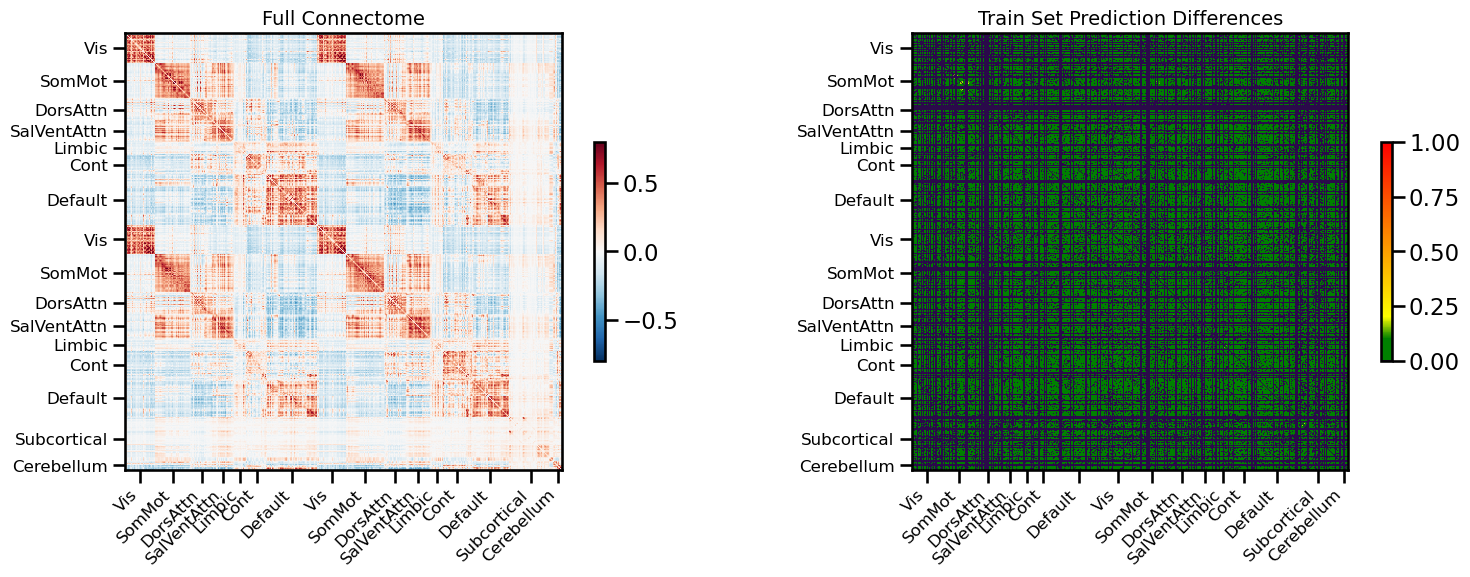

<Figure size 640x480 with 0 Axes>

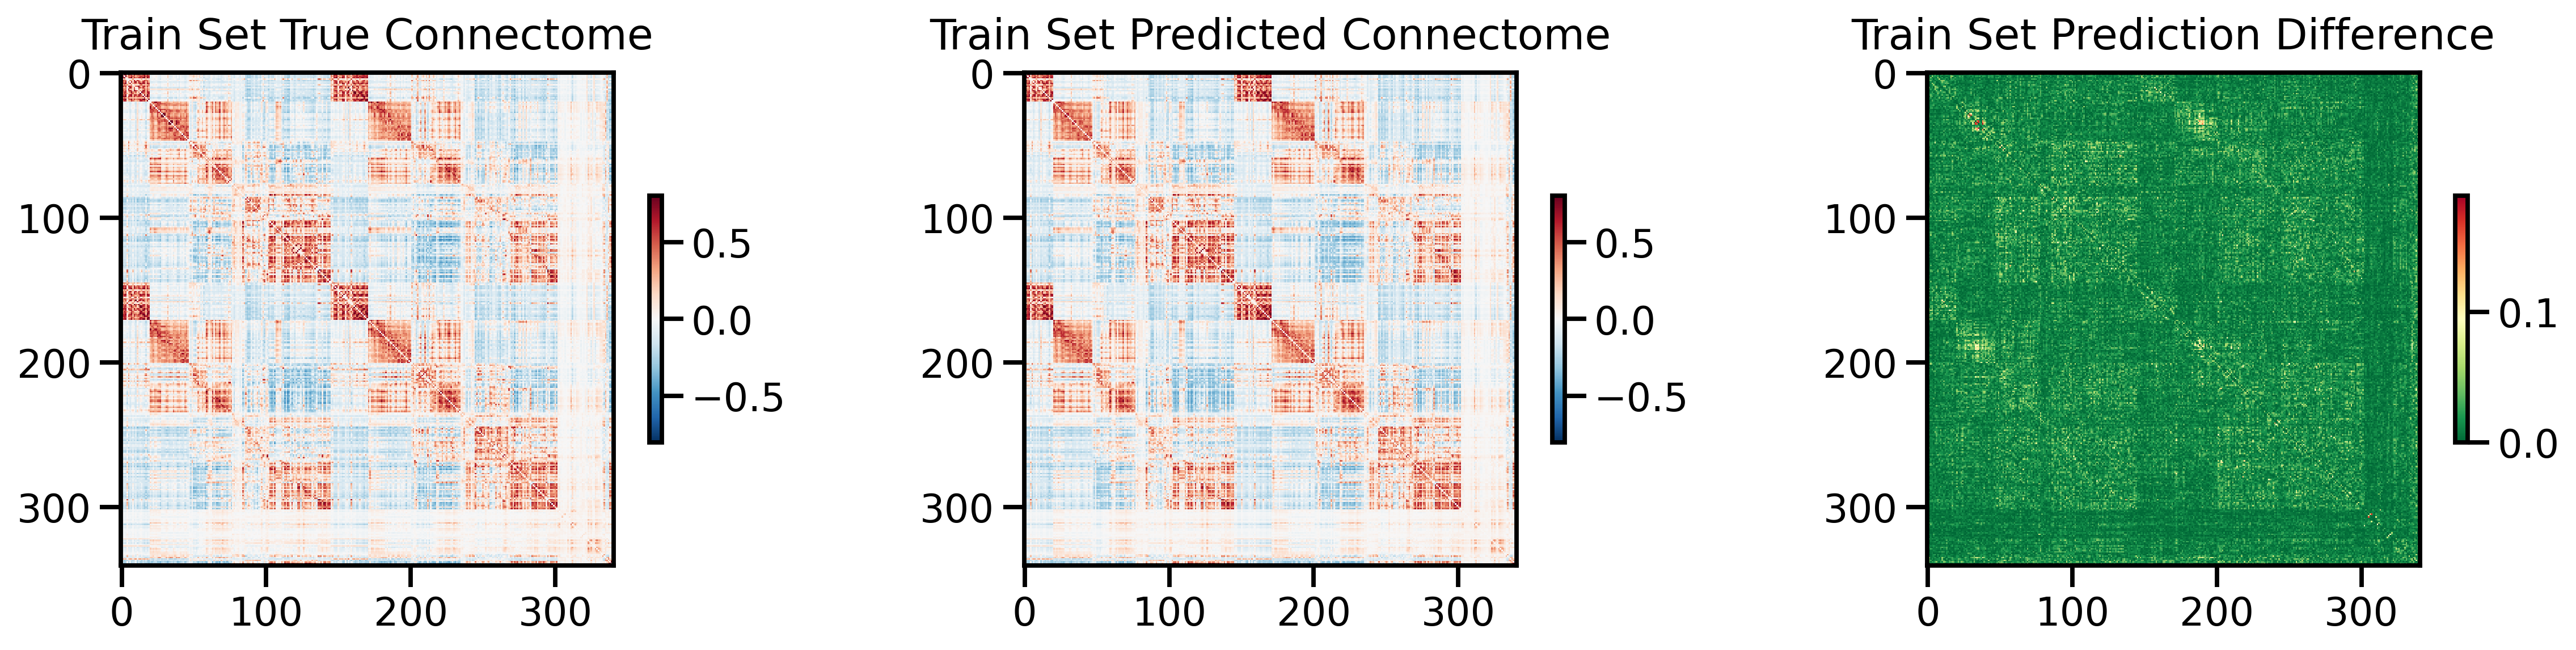

<Figure size 640x480 with 0 Axes>

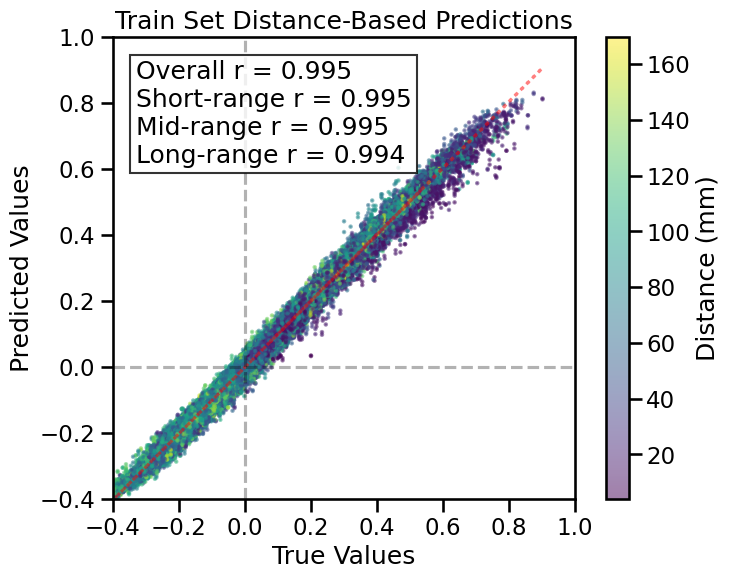

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

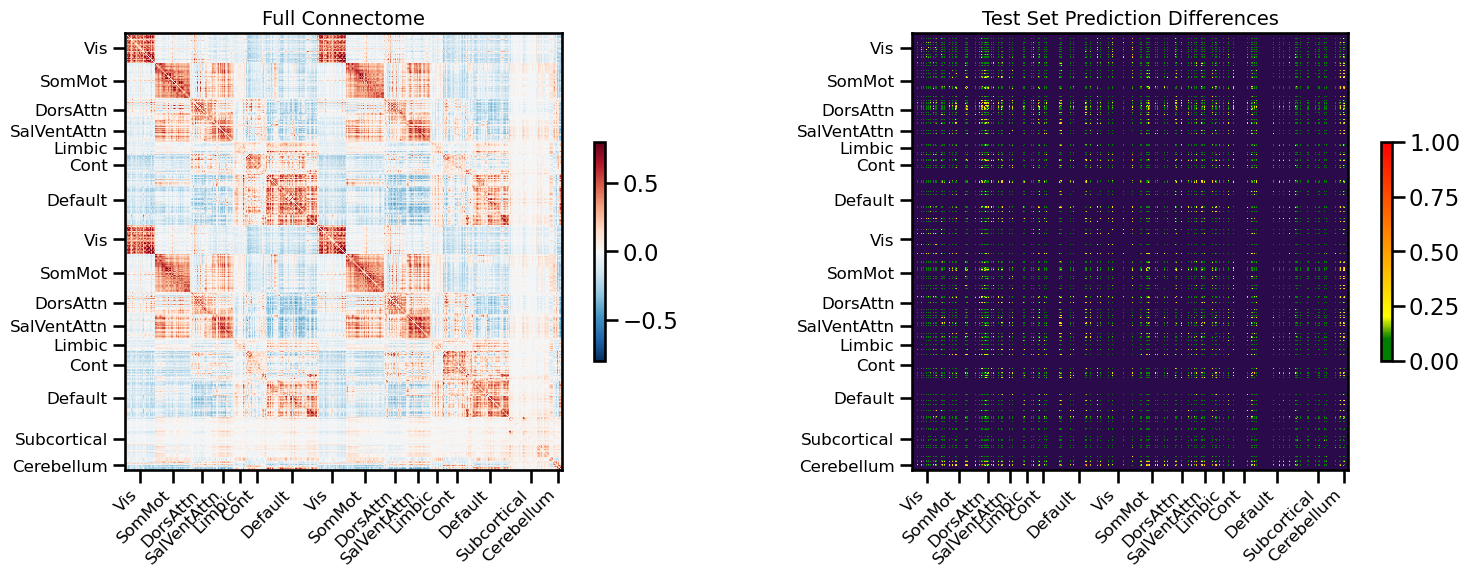

<Figure size 640x480 with 0 Axes>

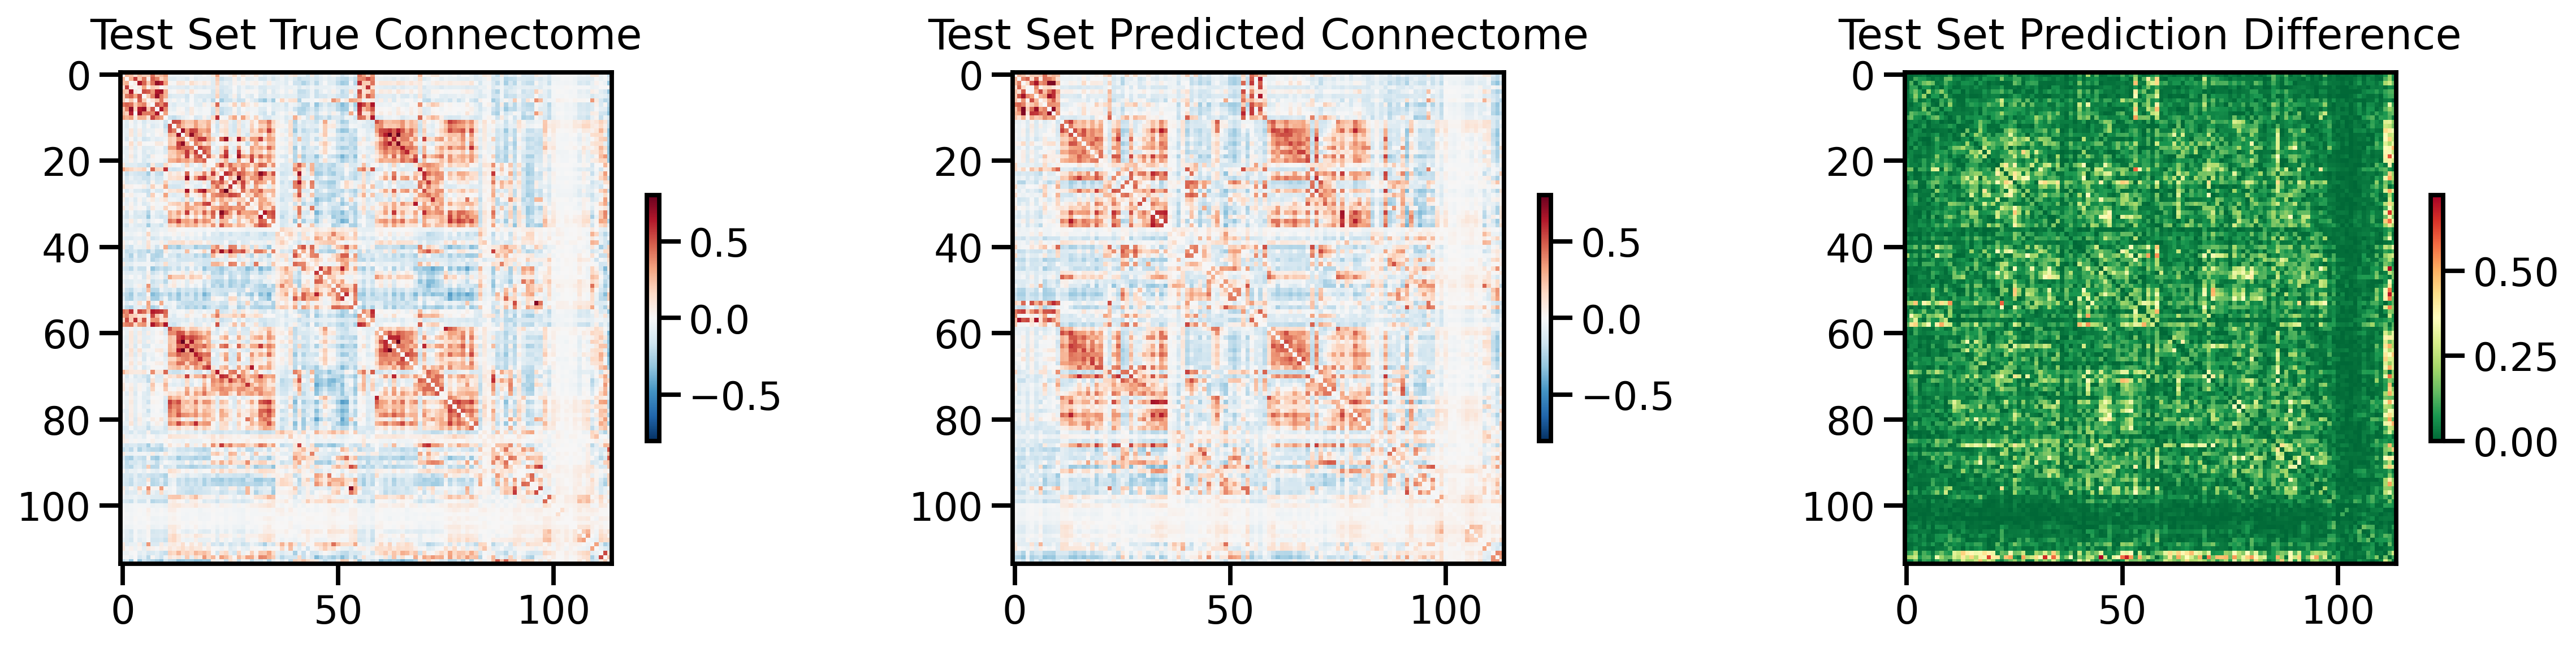

<Figure size 640x480 with 0 Axes>

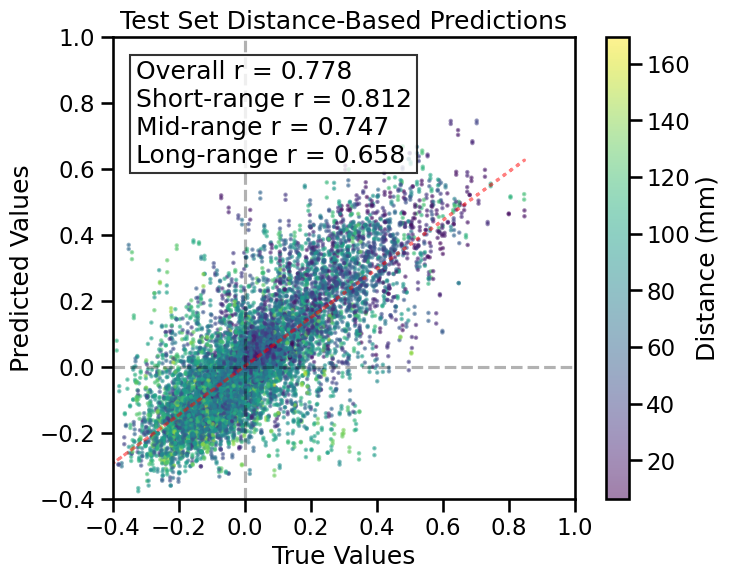

TRAIN METRICS
GLOBAL: mse=0.000340, mae=0.013812, r2=0.9900, pearson_r=0.9951, spearman_r=0.9935, geodesic_distance=11.8362
DISTANCE-BASED: short=0.9954, mid=0.9947, long=0.9943
HEMISPHERIC: left=0.9948, right=0.9957, inter=0.9953
CONNECTION STRENGTH: neg=0.8876, weak=0.9913, pos=0.9664
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9948    0.9946
  Default       0.9915    0.9936
  SalVentAttn    0.9915    0.9941
  Limbic        0.9947    0.9950
  DorsAttn      0.9946    0.9954
  SomMot        0.9964    0.9952
  Vis           0.9967    0.9959
  Subcortical    0.9913    0.9941
  Cerebellum    0.9934    0.9939

TEST METRICS
GLOBAL: mse=0.013903, mae=0.080780, r2=0.5753, pearson_r=0.7776, spearman_r=0.7441, geodesic_distance=9.9548
DISTANCE-BASED: short=0.8115, mid=0.7472, long=0.6575
HEMISPHERIC: left=0.7587, right=0.8256, inter=0.7731
CONNECTION STRENGTH: neg=-0.0590, weak=0.6720, pos=0.4440
NETWORK CORRELATIONS:
  NETWORK      I

<Figure size 640x480 with 0 Axes>

In [20]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              omit_subcortical=False,
              parcellation='S456',
              hemisphere='both',
              dataset='UKBB',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='none',
              use_folds=[0])

### Example SMT w/ CLS run for UKBB population connectome

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              omit_subcortical=False,
              parcellation='S456',
              hemisphere='both',
              dataset='UKBB',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True,
              null_model='none',
              use_folds=[0])

Resorting genes by reference genome order
Resorting genes by reference genome order
Number of components for 95% variance PCA: 27
Resorting genes by reference genome order
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
valid_indices 456
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: q7n41e3m
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/q7n41e3m
Initialized sweep with ID: q7n41e3m


  warnings.warn(



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 20, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'weight_decay': 0.0001, 'batch_size': 1024, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT w/ CLS model: 4686987
Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.15 GB
Best val loss so far at epoch 1: 0.0403
Best val loss so far at epoch 2: 0.0369
Best val loss so far at epoch 3: 0.0262
Best val loss so far at epoch 5: 0.0254
Epoch 5/110, Train Loss: 0.0962, Val Loss: 0.0254, Time: 11.38s
Best val loss so far at epoch 8: 0.0224
Epoch 10/110, Train Loss: 0.0621, Val Loss: 0.0271, Time: 12.81s
Epoch 15/110, Train Loss: 0.0370, Val Loss: 0.0240, Time: 10.57s
Best val loss

### Example MLP w/ coords run for UKBB population connectome

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}, 
                            {'euclidean': None}],
              omit_subcortical=False,
              parcellation='S456',
              hemisphere='both',
              dataset='UKBB',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='dynamic_mlp',
              use_gpu=True,
              null_model='none',
              use_folds=[0])

### Example SMT w/ CLS run for MPI-LEMON population connectome

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              omit_subcortical=False,
              parcellation='iPA_391',
              hemisphere='both',
              dataset='BHA2',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 5),
              track_wandb=False,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True,
              null_model='none',
              use_folds=[0])